**K181161 Sufyan Siddiqui DSCI Mid-II Take Home Exam Paper A**

In [3]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import  train_test_split,KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler as stds
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [4]:
df = pd.read_csv('Iris.csv')
df.head()
df.drop(columns=['Petal_length'],inplace=True)
df.head()

,Sepal_length,Sepal_width,Petal_width,Species
0,5.1,3.5,0.2,Setosa
1,4.9,3.0,0.2,Setosa
2,4.7,3.2,0.2,Setosa
3,4.6,3.1,0.2,Setosa
4,5.0,3.6,0.2,Setosa


In [5]:
array = df.values
X = array[:,0:3]
Y = array[:,3]
t_size = 0.20
acc=[]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=t_size, random_state=5)
#crossvalid = KFold(n_splits=5)
tr=[]
ts=[]
i=1
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i,metric='manhattan')
    score = cross_val_score(knn,X,Y,scoring='accuracy',cv=5)
    acc.append((i,score.mean()))
    print( "Accuracy:",score.mean(),"K:",i)
print("K, Max Accuracy")
print(max(acc, key=operator.itemgetter(1)))


Accuracy: 0.9533333333333334 K: 1
Accuracy: 0.9533333333333334 K: 2
Accuracy: 0.9466666666666667 K: 3
Accuracy: 0.9466666666666667 K: 4
Accuracy: 0.9266666666666667 K: 5
Accuracy: 0.9466666666666667 K: 6
Accuracy: 0.9400000000000001 K: 7
Accuracy: 0.9399999999999998 K: 8
Accuracy: 0.9466666666666665 K: 9
Accuracy: 0.9466666666666667 K: 10
K, Max Accuracy
(1, 0.9533333333333334)


In [6]:
#Q1B
crossvalid = KFold(10)
for train, test in crossvalid.split(X):
    dtree = DecisionTreeClassifier(criterion='entropy',min_weight_fraction_leaf=0.014)
    model = dtree.fit(X[train],Y[train])
    ypred = model.predict(X[test])
    a=accuracy_score(Y[test],ypred)
    print("Accuracy: ",a)
    print("Report: ",classification_report(Y[test],ypred))


Accuracy:  1.0
Report:                precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Accuracy:  1.0
Report:                precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Accuracy:  1.0
Report:                precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Accuracy:  1.0
Report:                precision    recall  f1-score   support

      Setosa       1.00      1

In [7]:
#Q2

df = pd.read_csv('diabetes.csv')
df.head()
df.drop(columns=['SkinThickness','DiabetesPedigreeFunction','Age'],inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Outcome
0,1,89,66,94,28.1,0
1,0,137,40,168,43.1,1
2,3,78,50,88,31.0,1
3,2,197,70,543,30.5,1
4,1,189,60,846,30.1,1


In [8]:
scaler=stds()
scaled_data=scaler.fit_transform(df)
newdata=pd.DataFrame(scaled_data)
newdata.head().describe()


,0,1,2,3,4,5
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,-0.588603,0.500542,-1.080354,1.620668,-0.059517,0.999695
std,0.355687,1.752842,0.980782,2.829194,0.832383,0.951125
min,-1.025344,-1.412915,-2.461427,-0.569426,-0.678875,-0.701729
25%,-0.713386,-1.062114,-1.658478,-0.518847,-0.401136,1.425051
50%,-0.713386,0.468651,-0.855528,0.104968,-0.345588,1.425051
75%,-0.401428,2.126981,-0.373759,3.266189,-0.276153,1.425051
max,-0.089470,2.382108,-0.052579,5.820456,1.404168,1.425051


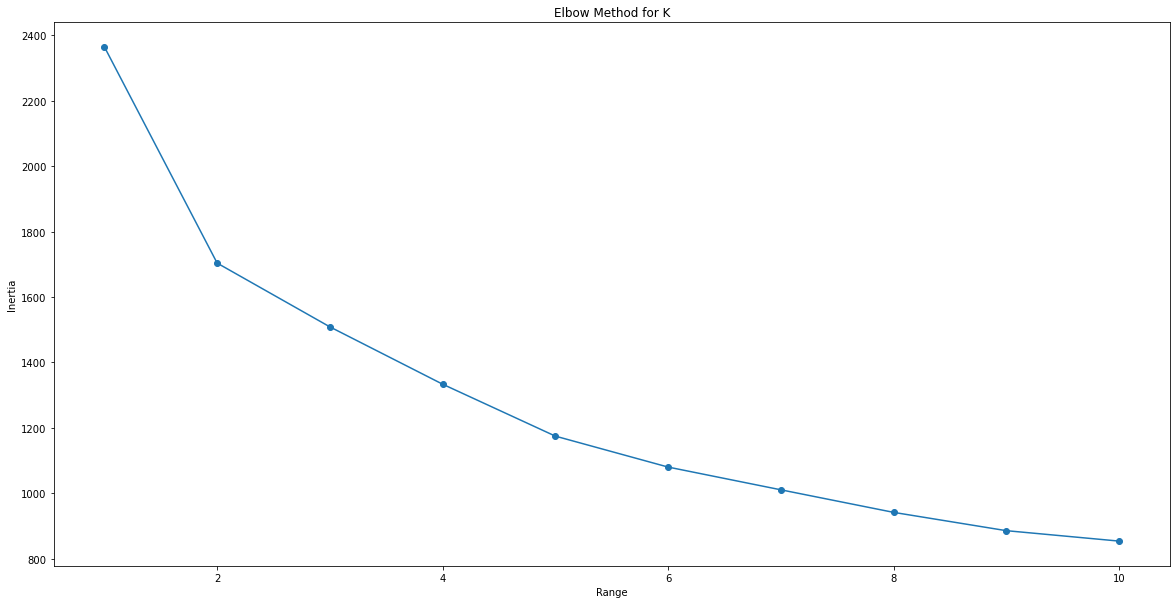

In [9]:
inert=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300)
    kmeans.fit(newdata)
    inert.append(kmeans.inertia_)
plt.figure(figsize=(20,10))
plt.plot(range(1,11),inert,marker='o')
plt.xlabel("Range")
plt.ylabel("Inertia")
plt.title("Elbow Method for K")
#plt.legend()
plt.show()

In [10]:
kmeans = KMeans(n_clusters=5,init='k-means++')
kmeans.fit(newdata)
kmeans.inertia_
pred = kmeans.predict(newdata)
frame=pd.DataFrame(pred)
frame['Cluster']=pred
frame.groupby('Cluster').size()


Cluster
0    148
1     73
2     96
3     46
4     31
dtype: int64

In [11]:
newdata['cluster']=pred
newdata.head()

,0,1,2,3,4,5,cluster
0,-0.713386,-1.062114,-0.373759,-0.518847,-0.678875,-0.701729,0
1,-1.025344,0.468651,-2.461427,0.104968,1.404168,1.425051,1
2,-0.089470,-1.412915,-1.658478,-0.569426,-0.276153,1.425051,0
3,-0.401428,2.382108,-0.052579,3.266189,-0.345588,1.425051,4
4,-0.713386,2.126981,-0.855528,5.820456,-0.401136,1.425051,4


134.06900654250256


Text(0.5, 1.0, 'Relationship between Glucose & Blood Pressure')

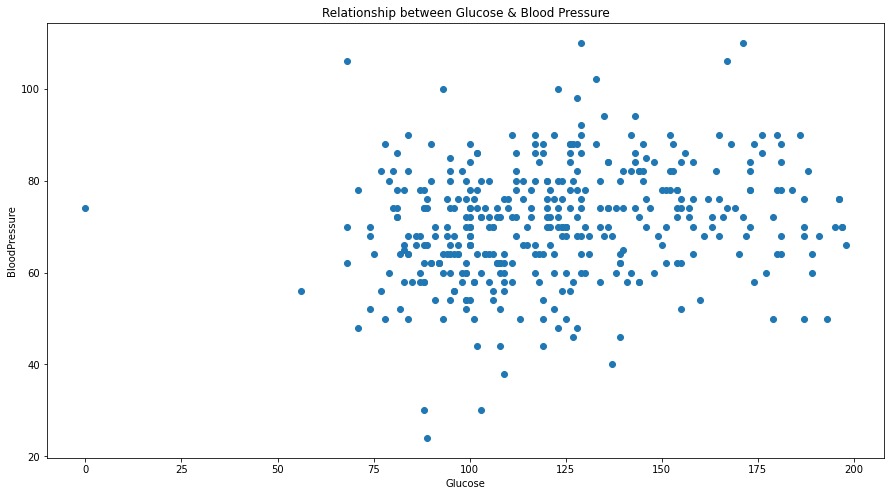

In [12]:
#Q2b
from sklearn.metrics import mean_squared_error

df2 = pd.read_csv('diabetes.csv')
df2.head()
df2.drop(columns=['SkinThickness','DiabetesPedigreeFunction','Age'],inplace=True)
df2.head()
X=df2['Glucose'].values.reshape(-1,1)
Y=df2['BloodPressure'].values.reshape(-1,1)
t_size=0.30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=t_size)

lm = LinearRegression()
model = lm.fit(X_train,Y_train)
ypred2 = model.predict(X_test)
MSE = mean_squared_error(Y_test, ypred2)
print(MSE)
X1=df2['Glucose'].values
Y1 = df2['BloodPressure'].values
df3 = pd.DataFrame(X1,Y1)
plt.figure(figsize=(15,8))
plt.scatter(X1,Y1,marker='o')
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.title('Relationship between Glucose & Blood Pressure')
